In [1]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt
import random
from fractions import Fraction
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import random_state, array_to_latex
#pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

import warnings
warnings.filterwarnings('ignore')



In [2]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).result().get_statevector())
        

In [3]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [4]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(quantumC, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [5]:
def makeCirc(n, state, b):
    initState = state
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    c = [0, 0]
    c[0] = b[0]/((b[0]**2 + b[1]**2)**(0.5))
    c[1] = b[1]/((b[0]**2 + b[1]**2)**(0.5))
    circ.initialize(c, 3)
    return circ

In [6]:
def getHisto(n, circ):
    qasm_sim = Aer.get_backend('qasm_simulator')
    shots = n
    qobj = assemble(circ, shots=shots)
    results = qasm_sim.run(qobj).result()
    counts = results.get_counts()
    return counts

In [7]:
def getPTrace(quantumCircuit, n):
    return quantum_info.partial_trace(execute(quantumCircuit, backend).result().get_statevector(), n)

In [8]:
def getState():
    m = np.array(getPTrace(circ, [0, 1, 2]))
    a = Fraction(np.real(m[0][0])).limit_denominator(1000000)
    b = Fraction(np.real(m[1][1])).limit_denominator(1000000)
    
    an = a.numerator**(0.5)
    bn = b.numerator**(0.5)
    
    ad = a.denominator
    
    if (m[0][1] < 0):
        bn = -bn
    return [ad, np.transpose(np.matrix([an, bn]))]

In [10]:
def hhl(b):
    #Matrix: [[3/2, 1/2], [1/2, 3/2]]
    circ = makeCirc(4, '0000', b)
    circ.barrier()
    
    #QPE
    circ.h(3)
    circ.cx(3, 2)
    circ.cx(2, 1)
    circ.x(2)
    circ.swap(1, 2)
    
    #Controlled Rotation
    circ.barrier()
    circ.crx(pi, 2, 0)
    circ.crx(pi/3, 1, 0)
    circ.barrier()
    
    #Inverse QPE
    circ.swap(1, 2)
    circ.x(2)
    circ.cx(2, 1)
    circ.cx(3, 2)
    circ.h(3)
    
    circ.barrier()
    circ.measure(0, 0)
    return circ


In [24]:
circ = hhl([0, 1])
print(getMeasure(circ, 1))
print(getState())
array_to_latex(getState()[1], pretext="|x\\rangle = ")

0000
['0001']
[10, matrix([[ 1.],
        [-3.]])]


<IPython.core.display.Math object>

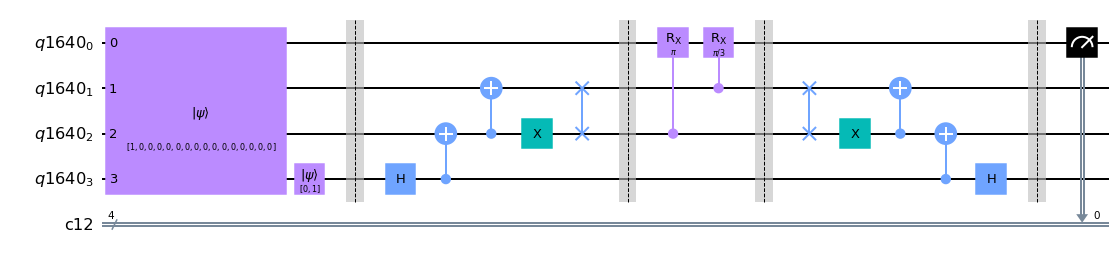

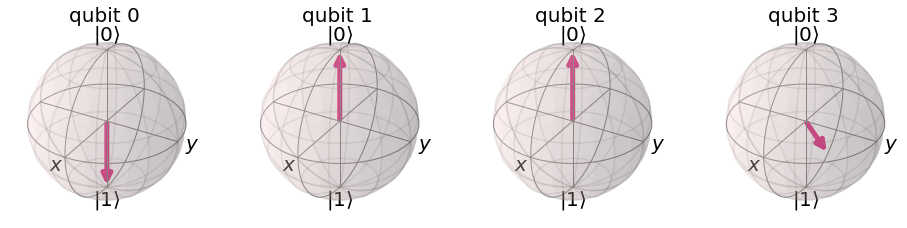

In [27]:
display(circ.draw('mpl'))
display(getBloch(circ))

In [ ]:
#Ancially Qubit 1
#Register Qubit 1
#Register Qubit 2
#Coefficient Qubit 1 - ket{b} = a{0} + b{1} = [a, b]

In [ ]:
#Qiskit - More Indepth HHL Tutorial (Generalize)